# Harmonic Oscillator RBM Challenge

(adapted from Eric Flynn's tutorial http://rbm.ascsn.net/ho/1dHO.html)

The purpose of this challenge is for you to build a reduced basis emulator to solve the Quantum Harmonic Oscillator problem:

\begin{equation}
    H \phi(x) = \lambda \phi(x),
\end{equation}

with

\begin{equation}
    H = -\frac{\partial^2}{\partial x^2} + \alpha x^2.
\end{equation}

You can get inspiration from: http://rbm.ascsn.net/.

Your tasks are:

- Build your reduced basis from the principal components (singular value decomposition) of a handful of high fidelity solutions:

\begin{equation}
    \phi(x) \approx \hat \phi(x) = \sum_{k=1}^n a_k \phi_k(x),
\end{equation}

We can use the finite element method for the high fidelity solver, which will be characterized by a grid size $N>>n$.

- Create the reduced equations by projecting the differential equation onto the subspace made by your own reduced basis:

\begin{equation}
   \langle \phi_j(x) |  \big( H -\lambda \big) | \hat \phi(x) \rangle =0 \ \text{for j=1, ... n}.
\end{equation}

You can use dot products in python as a way to calculate integrals between lists (vectors) representing functions. Since $H$ is linear, the previous equation projection can be broken into each $\phi_k$, effectively creating a reduced Hamiltonian system:

\begin{equation}
    \hat H_{j,i} = \langle \phi_j(x) |  H  | \phi_i(x) \rangle,
\end{equation} 


\begin{equation}
    \hat H \hat\phi = \hat\lambda \hat\phi,
\end{equation}

where now the coordinates for the function $\hat \phi$ are the coefficients $a_1,a_2,...a_n$.

- Create a Computational Accuracy vs Time plot to compare the performance of the reduced basis approximation with the high fidelity solver. You can change the total number of basis $n$ for the reduced basis approach and the grid size $N$ for the high fidelity solver.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import time

import timeit



In [2]:
def generate_second_derivative_matrix(xgrid):
    N = len(xgrid)
    dx = xgrid[1]-xgrid[0]
    
    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 /2 / dx**2)
    off_diag = np.ones(N - 1)* 4/3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))
    
    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)
    

    
    return D2


In [3]:
def generate_potential_matrix(xgrid):
    return np.diag(xgrid**2)


In [4]:
def HO_solver(alpha,D2Mat,vpot):
    
    H = -D2Mat + alpha*vpot
    evals,evects = np.linalg.eigh(H)
    
    return [evals[0],evects.T[0]]

In [5]:
#Example of a fixed grid

x_max = 10.0  # Maximum coordinate value for the grid

N_grid=150
# Set up the coordinate grid
x = np.linspace(-x_max, x_max, N_grid)

D20=generate_second_derivative_matrix(x)
V0=generate_potential_matrix(x)

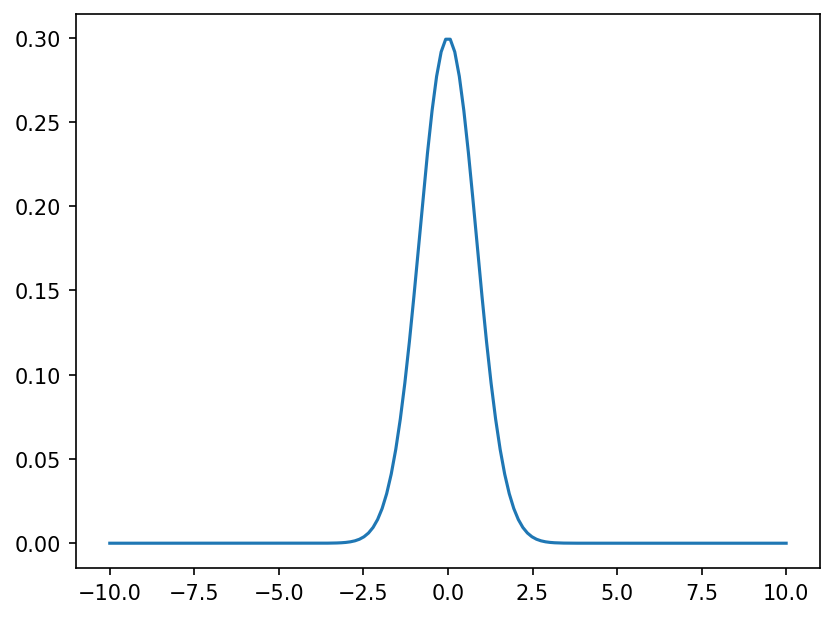

In [8]:
fig = plt.figure(dpi=150)

plt.plot(x,HO_solver(2,D20,V0)[1])

plt.show()

In [15]:
# set alphas
alpha = [0.5, 5, 10, 15]
Hs = []
for alph in alpha:
    Hs.append(HO_solver(alph, D20, V0)[1])
Hs = np.array(Hs)


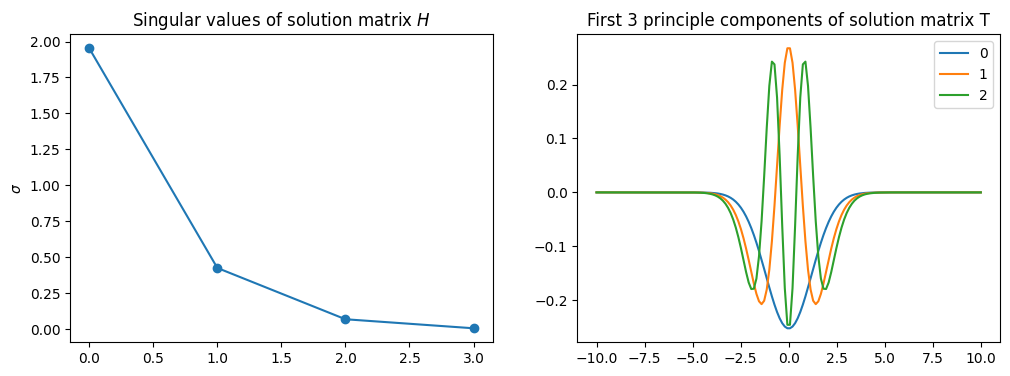

In [16]:
#Rest of the smart code goes here...
U, s, Vh = np.linalg.svd(Hs)
n_comps = 3 # number of principle components to plot (i.e number of column vectors of SVD matrix V to plot)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(s,'o-')
ax[0].set_title(r'Singular values of solution matrix $H$')
ax[0].set_ylabel(r'$\sigma$')
for i in np.arange(0,n_comps,1):
    ax[1].plot(x,Vh[:,i],label=str(i))
ax[1].set_title(f'First {n_comps} principle components of solution matrix T')
ax[1].legend()
plt.show()